<a href="https://colab.research.google.com/github/ntr1738/Ngawang-Rigdol-s-Portfolio/blob/main/Copy_of_QSI_Day_3_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Cirq II**
---

### **Description**
In today's lab, we will learn how to use the Z gate and look at different representations of qubit states in Cirq. We will wrap up with further practice producing and interpreting histograms of measurement results.

<br>

### **Lab Structure**
**Part 1**: [The Z Gate](#p1)

**Part 2**: [Working with Qubit Representations](#p2)

**Part 3**: [Histograms](#p3)


<br>

### **Resources**
* [Cirq Basics Cheat Sheet](https://docs.google.com/document/d/1Ir1qtXS2-C_tGThk00P1fZfZjoC8oet4N9Rtkw7LgVY/edit?usp=drive_link)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
import warnings
warnings.filterwarnings("ignore")


try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

import cirq_web


import matplotlib.pyplot as plt
import numpy as np

print("Libraries Imported Successfully!")

installing cirq...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 52.2 MB/s eta 0:00:00
installed cirq.
Libraries Imported Successfully!


<a name="p1"></a>

---
## **Part 1: The Z Gate**
---

#### **Problem #1.1**

Let's create a circuit that applies a Z gate and a measurement on a single qubit with the name 'q0'.

In [5]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.Z(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───Z───M───


#### **Problem #1.2**

Let's create a circuit that applies an H gate, a Z gate, and then a measurement on a single qubit with the name 'q0'. Then run the provided code to simulate this circuit.

In [6]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.Z(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───H───Z───M───


In [20]:
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 5)

print(result)

q0=00111


#### **Problem #1.3**

Now, create a circuit that applies an H gate, an Z gate, an H gate, and then a measurement on a single qubit with the name 'q0'. Then simulate this circuit 5 times.

In [33]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.Z(qubit))
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───H───Z───H───M───


In [34]:
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 5)

print(result)

q0=11111


#### **Problem #1.4**

Create a circuit that applies an H gate, an X gate, an H gate, and then a measurement on a single qubit with the name 'q0'. Then simulate this circuit 5 times.

In [36]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.X(qubit))
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───H───X───H───M───


In [42]:
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 5)

print(result)

q0=00000


#### **[OPTIONAL] Problem #1.5**

Create a circuit that applies some combination of 2 H gates and 2 Z gates so that it always produces a 1. For example, you could do:
* H, H, Z, Z
* Z, H, H, Z
* So on, so forth...

<br>

To be (relatively) sure of your answer, simulate the circuit 100 times.

In [47]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.Z(qubit))
circuit.append(cirq.H(qubit))
circuit.append(cirq.Z(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───H───Z───H───Z───M───


In [53]:
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)

print(result)

q0=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


<a name="p2"></a>

---
## **Part 2: Working with Qubit Representations**
---

#### **Problem #2.1**

Let's run the two cells below to see the state vector at the end of this circuit.

In [83]:

qubit = cirq.NamedQubit('q0')


circuit = cirq.Circuit()


circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))


print(circuit)

q0: ───X───M───


In [84]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)
print(vec)

[0.+0.j 1.+0.j]


#### **Problem #2.2**
Let's convert the vector from Problem #2.1 into Dirac (ket) notation.

In [78]:
cirq.dirac_notation(vec)

'|1⟩'

#### **Problem #2.3**

Let's create a Bloch Sphere using the vector from Problem #2.1 as the `state_vector`.

In [85]:
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

#####**Solution**

In [ ]:
cirq_web.bloch_sphere(state_vector = vec)

#### **Problem #2.4**

Now:
* Create a circuit that applies an H gate.
* Get the final statevector of this circuit.
* Print it in Dirac (ket) notation.
* Create the Bloch sphere for this state.

In [145]:

qubit = cirq.NamedQubit('q0')


circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))




print(circuit)

q0: ───H───M───


In [146]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)
print(vec)

[0.70710677+0.j 0.70710677+0.j]


In [147]:
cirq.dirac_notation(vec)

'0.71|0⟩ + 0.71|1⟩'

In [148]:
cirq_web.bloch_sphere.state_vector = vec

In [149]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)
print(vec)

[0.70710677+0.j 0.70710677+0.j]


In [150]:
cirq.dirac_notation(vec)

'0.71|0⟩ + 0.71|1⟩'

In [151]:
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

#### **Problem #2.5**

Now:
* Create a circuit that applies an H gate and then an Z gate.
* Get the final statevector of this circuit.
* Print it in Dirac (ket) notation.
* Create the Bloch sphere for this state.

In [96]:
# Step 1: Define qubit(s)
qubit = cirq.NamedQubit('q0')

# Step 2: Define a quantum circuit
circuit = cirq.Circuit()

# Step 3: Append gates and measurements to the quantum circuit
circuit.append(cirq.H(qubit))
circuit.append(cirq.Z(qubit))
circuit.append(cirq.measure(qubit))


print(circuit)

q0: ───H───Z───M───


In [97]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements= True)
print(vec)

[ 0.70710677+0.j -0.70710677+0.j]


In [98]:
cirq.dirac_notation(vec)

'0.71|0⟩ - 0.71|1⟩'

In [99]:
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

In [100]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)
print(vec)

[ 0.70710677+0.j -0.70710677+0.j]


In [101]:
cirq.dirac_notation(vec)

'0.71|0⟩ - 0.71|1⟩'

In [102]:
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

<a name="p3"></a>

---
## **Part 3: Histograms**
---

#### **Problem #3.1**

Now, put everything together by doing the following:
1. Create a circuit that applies an X gate and a measurement to a qubit.
2. Run this circuit 500 times.
3. Visualize the measurement results with a histogram.

In [172]:
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))

print(circuit)

q0: ───X───M───


In [107]:

sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 500)

print(result)

q0=11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


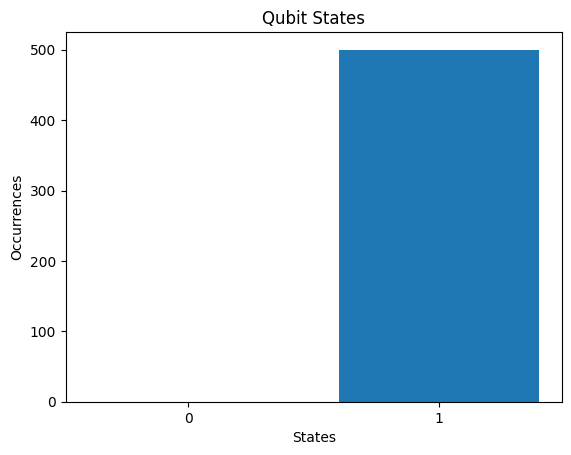

In [108]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences')
plt.show()

#### **Problem #3.2**

We have provided a circuit below that produces a state other than 0, 1, +, or -. You do not need to worry about how this circuit works. Instead:

1. Simulate this circuit 1000 times and print the results.
2. Plot the results in a histogram.
3. Guess what this state might be. Then check by actually producing the ket and Bloch Sphere for this qubit.

In [112]:
qubit = cirq.NamedQubit('q0')

circuit = cirq.Circuit()

circuit.append(cirq.ry(np.pi / 4)(qubit))
circuit.append(cirq.rz(np.pi)(qubit))
circuit.append(cirq.measure(qubit))

In [116]:
# Step 4: Run the circuit
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 1000)

print(result)

q0=0000000000100000000000000100100000000000110010000000000000000001000000000001000001001000000000000100000100010000000010000000100000110000000100000000010001000010000000001100000000010000000000010000010000001000001001010000110101000000000001010100011000011000000001010000000010000010000000000000100100001001010001011001001000000001000001000010100000000000000000000010000010000001000110100000000000000000000000010000000000010000000100100001000000000101000000000001000000000100000000000000000100000000001000100000001100100000000110000011000000100010100001000000000010000101100000000010000000000000000001000000001000100000100000000000001010000000010100100000000000100010000000000100000001010100000010000010010000000000000001000000010000000000000001001100001000110000000000001000000000010111000000000000000000100000000000000000000000000010000000000100001000000100000001100000001000001100001000000001000100000100000010000000100011000000000000000000010000000000010000000000110000010000010001000100000000000

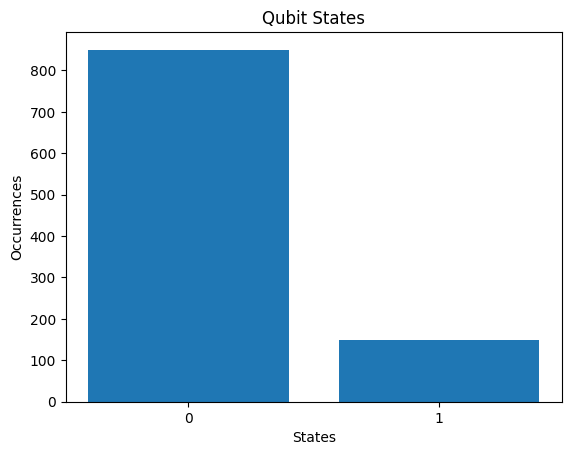

In [117]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences')
plt.show()

In [118]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)

print(cirq.dirac_notation(vec))
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

-0.92j|0⟩ + 0.38j|1⟩


#### **Problem #3.3**

We have provided a circuit below that produces a *random* state other than 0, 1, +, or -. You do not need to worry about how this circuit works. Instead:

1. Simulate this circuit 1000 times and print the results.
2. Plot the results in a histogram.
3. Guess what this state might be. Then check by actually producing the ket and Bloch Sphere for this qubit.

<br>

**NOTE**: Every time you run this code, it will produce a different state. So you can keep testing your ability to correctly guess the state as much as you would like.

In [137]:
qubit = cirq.NamedQubit('q0')

circuit = cirq.Circuit()

circuit.append(cirq.ry(np.random.uniform(0, 2 * np.pi))(qubit))
circuit.append(cirq.rz(np.random.uniform(0, 2 * np.pi))(qubit))
circuit.append(cirq.measure(qubit))
print(circuit)

q0: ───Ry(0.113π)───Rz(1.3π)───M───


In [138]:
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 1000)

print(result)

q0=0000000000000000000000000000000000000000000000000000000000001000000000000010000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000010000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000001000010000000000000000000000000000000000000100000000000000000000000000000000000001000000000000000000000000000000001000000000000000000100000000000000000001000000000000000000000100000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000100000000000000000000000000000000000000000000000000000100000000100000000000000000000010000000000000000001000000000000100000000000010000000000000000000000000000000000000010000000000000100001000000000000000000000000000000010000000000000000001000000000000010000000000000000000

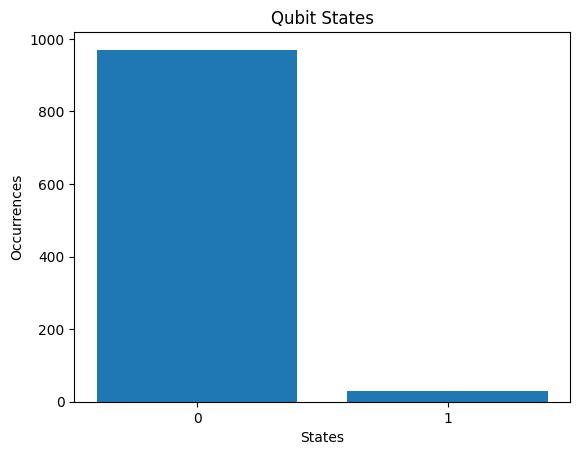

In [139]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences')
plt.show()

In [140]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)

print(cirq.dirac_notation(vec))
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

(-0.45-0.88j)|0⟩ + (-0.08+0.16j)|1⟩


#### **Reflection**

Try answering the following reflection questions:
1. What can you tell from the histogram of measurement results about the state you're measuring?

2. What *can't* you tell?

3. Is there anything you could do to the circuit or measurement results in order to tell this?

##### **Solution**

1. The histogram of measurement results gives you an idea of the amplitudes of each state. While it's never exact due to the nature of random measurements, it is our best guess at the probabilities of measuring each state.

2. This *does not* tell you the phase information. For instance, the difference between the + and - states is completely unclear from a histogram of measurement results.

3. We can tell the difference between the + and - states using an H gate right before measuring. If we apply this more generally, we can think of applying the H gate and then performing a measurement as giving you a phase measurement instead of an amplitude measurement.

#### **[CHALLENGE] Problem #3.4**

Try determining *exactly* which state that this qubit is in (using a ket and Bloch Sphere to confirm). You do not need to modify `circuit` at all, but we have provided you with a copy of it, `circuit_2`, that you can do whatever you want with and simulate separately to gather extra information.

<br>

**HINT**: Measuring directly can tell you the amplitudes of the 0 and 1 states (how big their contributions are). But for something like the + vs. - states, this won't be enough to tell you which of these states you have. Consider what you need to do to distinguish between these states and apply that here.

In [176]:
qubit = cirq.NamedQubit('q0')

circuit = cirq.Circuit()

circuit.append(cirq.ry(np.pi / 4)(qubit))
circuit.append(cirq.rz(np.pi)(qubit))
circuit.append(cirq.measure(qubit))
print(circuit)



q0: ───Ry(0.25π)───Rz(π)───M───


In [180]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)
print(vec)

[0.-0.9238795j  0.+0.38268343j]


In [183]:
cirq.dirac_notation(vec)

'-0.92j|0⟩ + 0.38j|1⟩'

In [184]:
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

In [185]:
circuit_2 = circuit.copy()
circuit_2 = cirq.Circuit()
circuit_2.append(cirq.H(qubit))
circuit_2.append(cirq.measure(qubit))
print(circuit_2)


q0: ───H───M───


q0=0010100001000000000100001000000000001000010000000000000000000000000001000010000100000000000001000101000000000001000000001010000010000000100000000000000001000010000000010000000011000000000000000000001000000000010001000000000000010000010010000010001000000000001000000010001000000100000000000000000110110000010000000000011001000001000000000000000000000010101000100100000000000001100000100000110000000100000000000001000000100100001000000000010010010000000100000000000000100000000000000100000000010000010000101000000000001000000001010000000000000000000000000001000001010000000100000000000001000001000000000101000100000000000001000011000000011000000001001000101100000000000000010100010010000000010000000001011000100000000000000110001000000000000000100000000000010000110000111000000000100000100011000010000000010000000100010010100000000000000000000000000001001010000000100000000000000010001000010000010000000000000010100000000000000010010000000011000010010000000001000000000000000000000010100000000000000

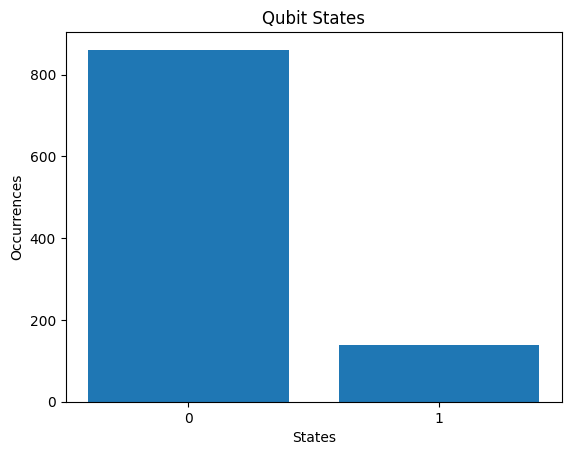

In [186]:
# Step 4: Run the circuit
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 1000)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences')
plt.show()

q0=0101100000111001110000000011011111000001011111011001101100010011010101100001000010110101100010011000100100001011110001100011100110001111111011110111010010010100110100011100101110011010111010101100101011101001011001101011111001010100011011101111010000000000010001001000011100001011100011000000000111111001011110111011001101111000100001000000000100011101001100011011011100111001011000000110000101100111000110100111111110010111001111100001011100011000111001101111100010101111110100100111000110000011100111101010000100011010100001100011110000011010010100001110011111001011100101100011011011000111000101001111111110011010111111010001000011100100001011111111000110011011000100001010011100100100110000010001111101111100100000110100101000110011010111000011010111111101101111010000000100011001010010010011111000000010100001111100000111010100010001111001000100001010011011101110100010011010001000000011000100111011001010011010110100111010101010100100001110010110001001110101000111011001111011010001110101011

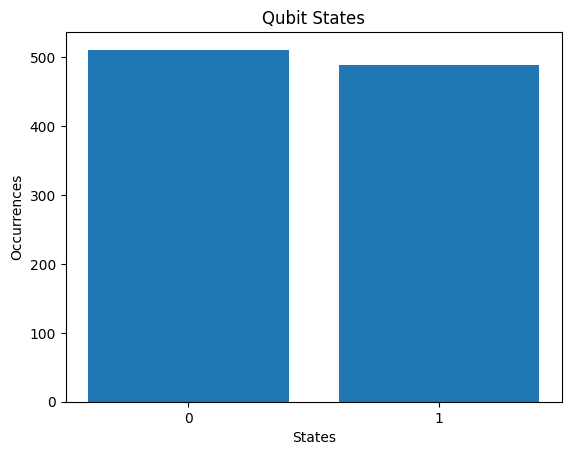

In [190]:
# Step 4: Run the circuit
sim = cirq.Simulator()
result = sim.run(circuit_2, repetitions = 1000)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences')
plt.show()

In [191]:
vec = cirq.final_state_vector(circuit, ignore_terminal_measurements = True)

print(cirq.dirac_notation(vec))
cirq_web.bloch_sphere.BlochSphere(state_vector = vec)

-0.92j|0⟩ + 0.38j|1⟩


#End of notebook
---
© 2024 The Coding School, All rights reserved